<a href="https://colab.research.google.com/github/247joseph/247joseph/blob/main/sharlet_task3_mc_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Our objective is to study the possible reasons for employee retention in our data. Analysis of employee retention based on the provided variables is fundamentally a *predictive modelling problem*. Primarily, we analyze all the data variables and identify the target variable. There were 29 variables with significant non-null, non-unique values. 13 of them were numerical variables, 3 of them were Binary variables including the target variable Left and 12 of them were categorical variable and the unique Employee ID.

Predictive Modelling Problem means predicting the factors that lead to employee attrition and modelling these relationships to predict future turnovers. We analyze the correlation with various attributes with the target variable, "Left". Multiple analytical frameworks could be used for the same. In predicting problems such as employee retention, where we have possible initial guesses and questions which we might like to explore *Question-Visualization-Observation (QVO)* could be utilized. Without confronting these initial guesses we could directly apply statistical models or machine learning models and check whether the results are logically reasonable. In cases where we would like to conduct our analysis beyond casual relationships, we could utilize the Casual Inference Framework, to understand the potential casual relationships.

As our task, needs to be finished in 4-6 hours, we utilize the Predictive Analytics Framework, where we directly apply statistical models and cautiously check if the insights are reasonable. We use heatmaps to observe the correlation between the numerical variables and the target variable "Left". Similarly, we perform correlation analysis for categorical variables using a one-hot encoding.

In our predictive analytics approach, we will first conduct a thorough exploratory data analysis (EDA) using heatmaps to visualize correlations between all numerical variables and the target variable 'Left'. This will help identify initial patterns and inform the selection of variables for the model. Categorical variables will be encoded using one-hot encoding to facilitate correlation analysis. We will apply logistic regression for its interpretability and relevance to binary outcomes, supplemented by random forests to capture more complex relationships. Model performance will be validated through cross-validation to ensure robustness. Finally, feature importance will be extracted from the model, providing clear guidance on which factors most significantly influence employee turnover. Throughout our analysis, we will maintain a focus on ethical considerations, ensuring our model fairly represents all employee groups.

In [5]:

# There exists three types of variables for our approach, which are binary variables, categorical variables and the numerical variables.

# We understand the correlation between numerical variables by plotting a biserial correlation Matrix, the description of the same is available in the cells. And we understand the correlation between various numerical variables. And later we study the correlation between the categorical variables and the relation between the employees who left the organization. There are other features such as the Venn Diagram type of relations.

# And similarly we have Venn Diagram type of relation, with Job ID which is grouped as a Family named as Job Family ID and Job Sub Family ID.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import os
import os
print(os.getcwd())

/content


### Loading the Employee

In [10]:
Employee = pd.read_csv("https://docs.google.com/spreadsheets/d/1LkShGvBmLqYtB1h-bZhdDtUM5RcQt3cm_SUHt4y_5Bc/gviz/tq?tqx=out:csv&sheet=data")

In [11]:
Employee

,Employee,Manager of employee,Age,Length of service in months,Gender,Nationality,Weekly working hour,Employee Category,Job Family ID,Sub Job Family ID,...,Children,Got Children in n-Month,Got Second Job in n-Month,Marital Status,Married in n-Month,Difference to Median of Team Pay and Job Type (in %),Z Score in the Team and Job Type,Commuting distance (in Kilometers),Commuting duration (in Minutes),Left
0,737d4128,65dd59a3,54,246,0,CI,26.00,salaried empl.,8e987853,36d55498,...,1.0,NaN,NaN,1.0,NaN,19.688119,1.380055,34.6720,25.71,0
1,8253035f,d712eb4d,47,302,1,CI,13.00,salaried empl.,ef306796,ce010575,...,0.0,NaN,NaN,1.0,NaN,0.000000,0.000000,7.6128,9.26,0
2,aec9bace,ece88ac2,52,246,0,CI,22.75,salaried empl.,99ee03c7,037698ad,...,1.0,NaN,NaN,1.0,NaN,0.000000,-0.028533,13.2240,11.79,0
3,d8ad9884,6805ca5f,55,318,0,CI,26.00,salaried empl.,8e987853,c09e11c5,...,1.0,NaN,NaN,1.0,NaN,0.000000,0.000000,38.6312,24.51,0
4,8c3c7a5d,1dc8aff8,54,252,0,CI,22.75,salaried empl.,99ee03c7,037698ad,...,0.0,NaN,NaN,1.0,NaN,11.481544,0.834442,13.6592,14.37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79481,39e2dced,71a36c27,40,10,0,CI,26.00,salaried empl.,c4f69a5d,67fec8ec,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.6744,24.98,0
79482,b010f5fe,1fa88400,51,8,0,CI,26.00,salaried empl.,282d7f4d,8e5ff451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9856,8.48,0
79483,7c81c70b,176c1084,54,8,0,CI,22.75,salaried empl.,1f09a45b,bbad17fa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4008,6.96,0
79484,496d3412,d0b8fc18,48,7,0,CI,22.75,salaried empl.,8e987853,c09e11c5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4488,27.76,0


In [12]:
Employee.dtypes

,0
Employee,object
Manager of employee,object
Age,int64
Length of service in months,int64
Gender,int64
Nationality,object
Weekly working hour,float64
Employee Category,object
Job Family ID,object
Sub Job Family ID,object


In [13]:
Employee.nunique()

,0
Employee,79463
Manager of employee,8440
Age,57
Length of service in months,404
Gender,2
Nationality,112
Weekly working hour,103
Employee Category,2
Job Family ID,19
Sub Job Family ID,69


In [14]:
# This helps us view the index number and label for each column and understand the values i each column
Employee.columns = Employee.columns.str.replace(" ", "_")

In [15]:
# descriptive statistics for numeric variables
Employee.describe()

,Age,Length_of_service_in_months,Gender,Weekly_working_hour,Cal._year_/_month,Full_Time_Equivalents,Difference_to_Average_Age_of_the_Team_(in_Years),Difference_to_Average_Length_of_Service_of_Team_(in_Years),Difference_to_Managers_Age_(in_Years),Difference_to_Managers_Length_of_Service_(in_Years),...,Children,Got_Children_in_n-Month,Got_Second_Job_in_n-Month,Marital_Status,Married_in_n-Month,Difference_to_Median_of_Team_Pay_and_Job_Type_(in_%),Z_Score_in_the_Team_and_Job_Type,Commuting_distance_(in_Kilometers),Commuting_duration_(in_Minutes),Left
count,79486.000000,79486.000000,79486.000000,79486.000000,7.948600e+04,79486.000000,79108.000000,79486.000000,78887.000000,79265.000000,...,25110.000000,2022.000000,63.000000,25110.000000,1036.000000,25155.000000,25156.000000,60615.000000,60615.000000,79486.000000
mean,37.021551,107.926125,0.230745,25.324651,7.202400e+00,0.975035,-0.001936,0.001999,-1.628892,-2.586511,...,0.536360,28.151335,30.476190,0.594265,27.602317,0.257023,-0.001077,35.511260,24.428373,0.008681
std,9.775824,85.188901,0.421312,2.675666,1.662680e-12,0.102064,8.542819,6.902631,8.682806,8.573475,...,0.498686,15.892478,14.510127,0.491043,15.744216,9.826342,0.619343,128.837207,72.330728,0.092766
min,14.000000,0.000000,0.000000,1.891500,7.202400e+00,0.070000,-47.024025,-30.178125,-31.798494,-36.562500,...,0.000000,6.000000,6.000000,0.000000,6.000000,-88.859384,-2.709185,0.032000,0.140000,0.000000
25%,30.000000,40.000000,0.000000,24.375000,7.202400e+00,0.940000,-5.628999,-4.219934,-7.388090,-7.812500,...,0.000000,12.000000,18.000000,0.000000,12.000000,-3.709818,-0.468788,6.103200,7.750000,0.000000
50%,36.000000,90.000000,0.000000,26.000000,7.202400e+00,1.000000,0.000000,-0.386754,-1.857084,-2.625000,...,1.000000,24.000000,36.000000,1.000000,24.000000,0.000000,0.000000,12.967200,12.670000,0.000000
75%,45.000000,158.000000,0.000000,26.000000,7.202400e+00,1.000000,5.794980,3.825000,3.809993,1.750000,...,1.000000,48.000000,48.000000,1.000000,36.000000,3.696689,0.466288,24.107600,18.610000,0.000000
max,112.000000,468.000000,1.000000,31.200000,7.202400e+00,1.200000,47.024025,33.715385,47.665161,32.500000,...,1.000000,48.000000,48.000000,1.000000,48.000000,234.893324,2.328846,3809.196800,1769.780000,1.000000


In [16]:
(Employee['Left'].sum()/Employee['Left'].count())

0.00868077397277508

Clearly the turnover rate is around 0.8 % and we need to understand the significant reasons for the low values

In [17]:
Employee.isna().sum()

,0
Employee,0
Manager_of_employee,210
Age,0
Length_of_service_in_months,0
Gender,0
Nationality,0
Weekly_working_hour,0
Employee_Category,0
Job_Family_ID,0
Sub_Job_Family_ID,0


Clearly we could see that more than 50% of the data values are NULL. Hence we drop these coloumns.
- Became Single in n-Month: 79146
- Children: 54376
- Got Children in n-Month: 77464
- Got Second Job in n-Month: 79423
- Marital Status: 54376
- Married in n-Month: 78450
- Difference to Median of Team Pay and Job Type (in %): 54331
- Z Score in the Team and Job Type: 54330

We could immute the coloumns Commuting direction and Commuting duration.

In [18]:
Employee.drop(['Became_Single_in_n-Month', 'Children', 'Got_Children_in_n-Month', 'Got_Second_Job_in_n-Month', 'Marital_Status', 'Married_in_n-Month', 'Difference_to_Median_of_Team_Pay_and_Job_Type_(in_%)', 'Z_Score_in_the_Team_and_Job_Type'
], axis= 1, inplace= True)

From this data information we could classify them as categorical data as well as the numerical data.

In [19]:
Employee.groupby("Manager_of_employee")['Employee'].count().reset_index().describe()

,Employee
count,8440.000000
mean,9.392891
std,9.459459
min,1.000000
25%,4.000000
50%,7.000000
75%,12.000000
max,146.000000


In [20]:
# Filter the DataFrame for rows where 'left' column is 1
filtered_data = Employee[Employee['Left'] == 1]

# Group by 'Manager_of_employee', count 'Employee' for each group, reset index, and describe
result = filtered_data.groupby('Manager_of_employee')['Employee'].count().reset_index()

In [22]:
# Filter the results to include only those managers where the count of employees who have left is greater than 5
filtered_result = result[result['Employee'] > 2]
filtered_result

,Manager_of_employee,Employee
175,4c4eee39,3
254,6a1e3277,5
440,b1ed2ffd,3


We see that tha particular Manager has the employee retention count greater than 2

In [23]:
Employee.groupby(['Probation_Period', 'Left'])['Employee'].count()

Probation_Period  Left
0                 0       77488
                  1         676
1                 0        1308
                  1          14
Name: Employee, dtype: int64

In [24]:
Employee_Turnover = Employee[Employee['Left'] == 1]

In [25]:
Curr_Employee = Employee[Employee['Left'] == 0]

In [26]:
Employee_Turnover.describe().loc[['mean', 'std', 'min', 'max','count']]

,Age,Length_of_service_in_months,Gender,Weekly_working_hour,Cal._year_/_month,Full_Time_Equivalents,Difference_to_Average_Age_of_the_Team_(in_Years),Difference_to_Average_Length_of_Service_of_Team_(in_Years),Difference_to_Managers_Age_(in_Years),Difference_to_Managers_Length_of_Service_(in_Years),Female_Quota_of_the_Team_(in_%),Foreigner_Quota_of_the_Team_(in_%),Number_of_Colleagues_in_the_Team,Probation_Period,Commuting_distance_(in_Kilometers),Commuting_duration_(in_Minutes),Left
mean,35.717391,98.094203,0.240580,25.386786,7.202400e+00,0.977275,-1.224341,-0.653647,-2.332417,-3.176796,16.297157,4.213025,19.855072,0.020290,37.560456,26.025054,1.0
std,10.072588,84.057007,0.427746,2.454203,5.421819e-14,0.093622,8.839837,6.680205,8.820131,8.087260,17.286836,10.022352,19.220722,0.141092,109.624642,69.521321,0.0
min,16.000000,0.000000,0.000000,13.000000,7.202400e+00,0.500000,-25.643776,-19.281818,-25.192334,-30.250000,0.000000,0.000000,1.000000,0.000000,0.096000,0.660000,1.0
max,64.000000,402.000000,1.000000,31.200000,7.202400e+00,1.200000,21.800582,26.765625,24.406571,26.437500,65.000000,80.000000,154.000000,1.000000,1541.668800,1092.450000,1.0
count,690.000000,690.000000,690.000000,690.000000,6.900000e+02,690.000000,687.000000,690.000000,686.000000,689.000000,690.000000,690.000000,690.000000,690.000000,465.000000,465.000000,690.0


In [27]:
Curr_Employee.describe().loc[['mean', 'std', 'min', 'max','count']]

,Age,Length_of_service_in_months,Gender,Weekly_working_hour,Cal._year_/_month,Full_Time_Equivalents,Difference_to_Average_Age_of_the_Team_(in_Years),Difference_to_Average_Length_of_Service_of_Team_(in_Years),Difference_to_Managers_Age_(in_Years),Difference_to_Managers_Length_of_Service_(in_Years),Female_Quota_of_the_Team_(in_%),Foreigner_Quota_of_the_Team_(in_%),Number_of_Colleagues_in_the_Team,Probation_Period,Commuting_distance_(in_Kilometers),Commuting_duration_(in_Minutes),Left
mean,37.032971,108.012221,0.230659,25.324107,7.202400e+00,0.975015,0.008773,0.007740,-1.622721,-2.581335,14.944973,3.875703,19.852124,0.016600,35.495418,24.416029,0.0
std,9.772483,85.194261,0.421257,2.677533,2.106773e-12,0.102136,8.539456,6.904313,8.681397,8.577486,16.373340,8.822798,20.063997,0.127767,128.975235,72.352440,0.0
min,14.000000,0.000000,0.000000,1.891500,7.202400e+00,0.070000,-47.024025,-30.178125,-31.798494,-36.562500,0.000000,0.000000,1.000000,0.000000,0.032000,0.140000,0.0
max,112.000000,468.000000,1.000000,31.200000,7.202400e+00,1.200000,47.024025,33.715385,47.665161,32.500000,65.000000,80.000000,154.000000,1.000000,3809.196800,1769.780000,0.0
count,78796.000000,78796.000000,78796.000000,78796.000000,7.879600e+04,78796.000000,78421.000000,78796.000000,78201.000000,78576.000000,78796.000000,78796.000000,78796.000000,78796.000000,60150.000000,60150.000000,78796.0


In [28]:
Employee.columns.to_list()

['Employee',
 'Manager_of_employee',
 'Age',
 'Length_of_service_in_months',
 'Gender',
 'Nationality',
 'Weekly_working_hour',
 'Employee_Category',
 'Job_Family_ID',
 'Sub_Job_Family_ID',
 'Job',
 'Region',
 'Country',
 'HR_location',
 'Board',
 'Function',
 'Division_//_Segment',
 'Segment_Unit',
 'Cal._year_/_month',
 'Full_Time_Equivalents',
 'Difference_to_Average_Age_of_the_Team_(in_Years)',
 'Difference_to_Average_Length_of_Service_of_Team_(in_Years)',
 'Difference_to_Managers_Age_(in_Years)',
 'Difference_to_Managers_Length_of_Service_(in_Years)',
 'Female_Quota_of_the_Team_(in_%)',
 'Foreigner_Quota_of_the_Team_(in_%)',
 'Number_of_Colleagues_in_the_Team',
 'Probation_Period',
 'Commuting_distance_(in_Kilometers)',
 'Commuting_duration_(in_Minutes)',
 'Left']

In [29]:
print(Employee['Cal._year_/_month'].unique())

[7.2024]


In [30]:
print(Employee['Cal._year_/_month'].value_counts())

Cal._year_/_month
7.2024    79486
Name: count, dtype: int64


In [31]:
Employee = Employee.drop('Cal._year_/_month', axis=1)

In [32]:
Employee.groupby(['Job_Family_ID', 'Left'])['Employee'].count().reset_index()

,Job_Family_ID,Left,Employee
0,#,0,17
1,0263a28a,0,1934
2,0263a28a,1,18
3,0a6c15c6,0,179
4,0a6c15c6,1,2
5,1f09a45b,0,2851
6,1f09a45b,1,22
7,20a1fe61,0,471
8,20a1fe61,1,5
9,282d7f4d,0,1365


In [33]:
HR = Employee.groupby(['Country', 'Left'])['Employee'].count().reset_index()

Among the total Employers, we could see that more than 50% percentage of the employees who are leaving the company includes the ones who worked as the industrial labourers. Whereas most of the current as well as

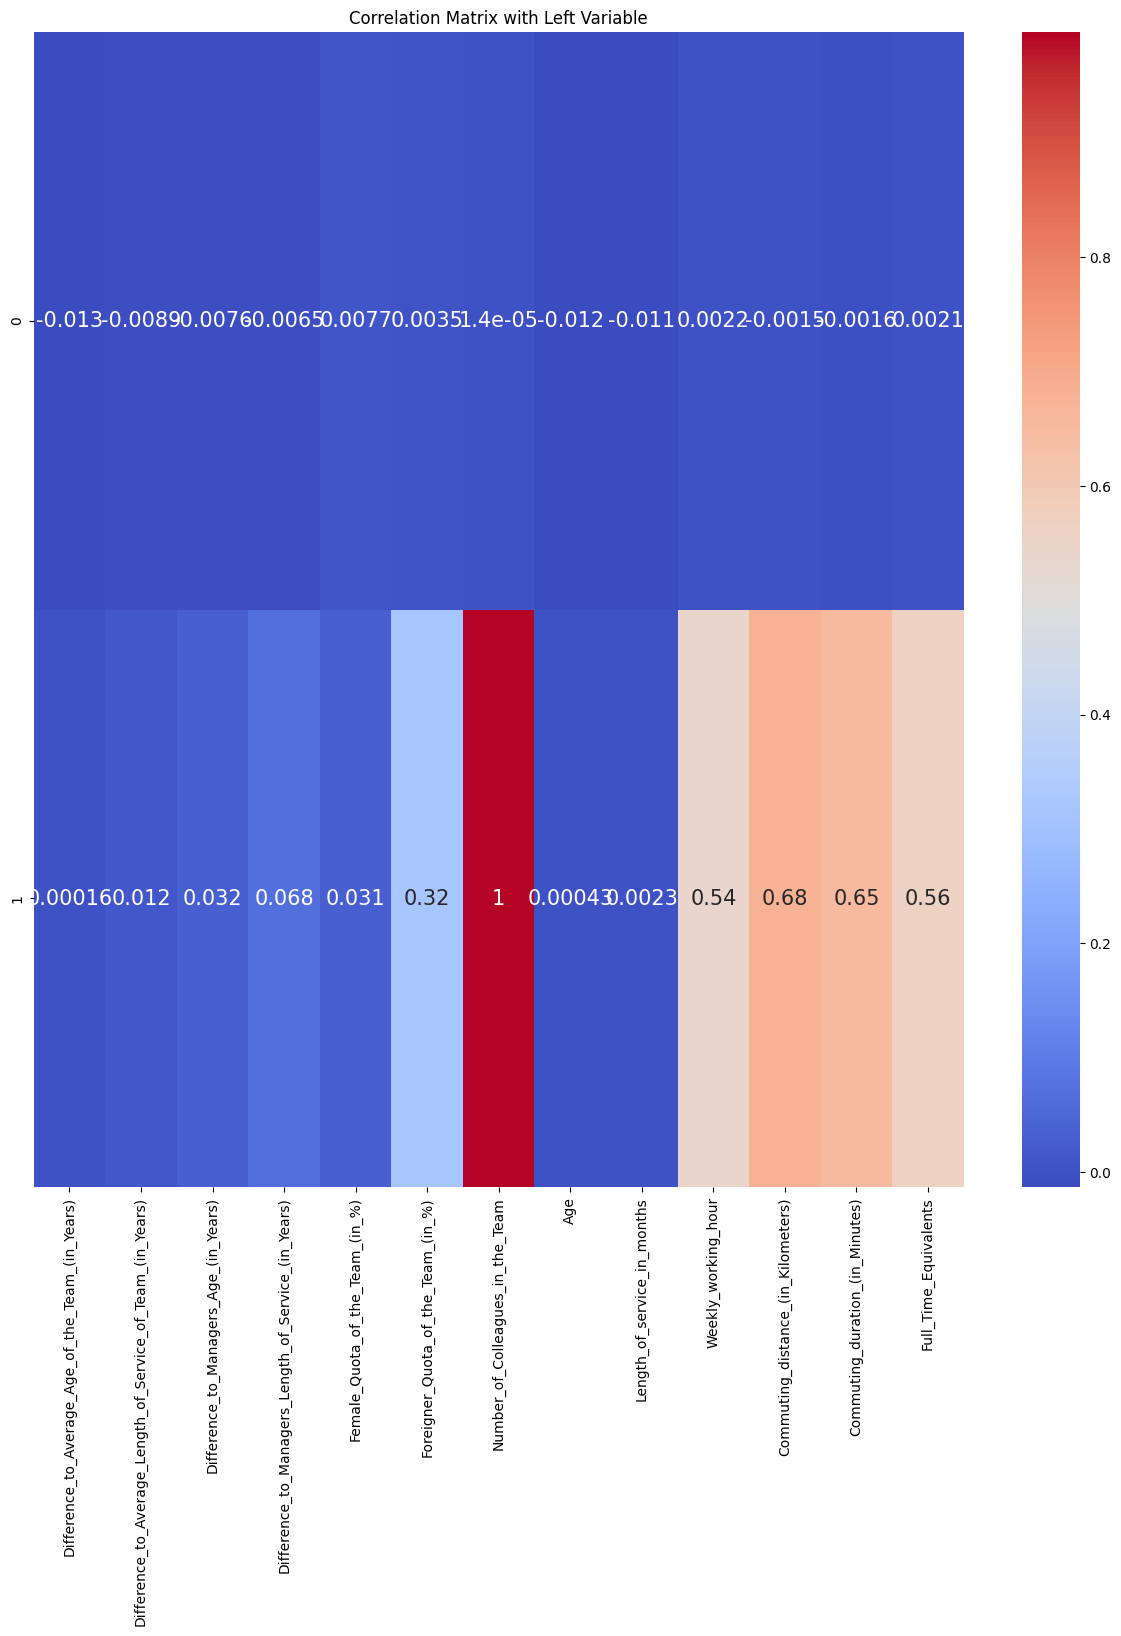

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'Employee' is your pre-loaded DataFrame

# Calculate Point Biserial Correlation for each variable with 'Left'
variables = ['Difference_to_Average_Age_of_the_Team_(in_Years)', 'Difference_to_Average_Length_of_Service_of_Team_(in_Years)',
             'Difference_to_Managers_Age_(in_Years)', 'Difference_to_Managers_Length_of_Service_(in_Years)',
             'Female_Quota_of_the_Team_(in_%)', 'Foreigner_Quota_of_the_Team_(in_%)', 'Number_of_Colleagues_in_the_Team',
             'Age', 'Length_of_service_in_months', 'Weekly_working_hour', 'Commuting_distance_(in_Kilometers)',	'Commuting_duration_(in_Minutes)','Full_Time_Equivalents']

# Fill NaN values with zeros in the specified columns
Employee[variables] = Employee[variables].fillna(0)
Curr_Employee.loc[:, variables] = Curr_Employee[variables].fillna(0)

plt.figure(figsize=(15,15))

# correlation_matrix = Curr_Employee[variables + ['Left']].corr()
sns.heatmap(Employee[variables].corrwith(Employee['Left'].astype('float'), method=stats.pointbiserialr), annot=True, cmap='coolwarm', annot_kws={"size":15})
plt.title('Correlation Matrix with Left Variable')
plt.savefig("plot.pdf", format='pdf')
plt.show()


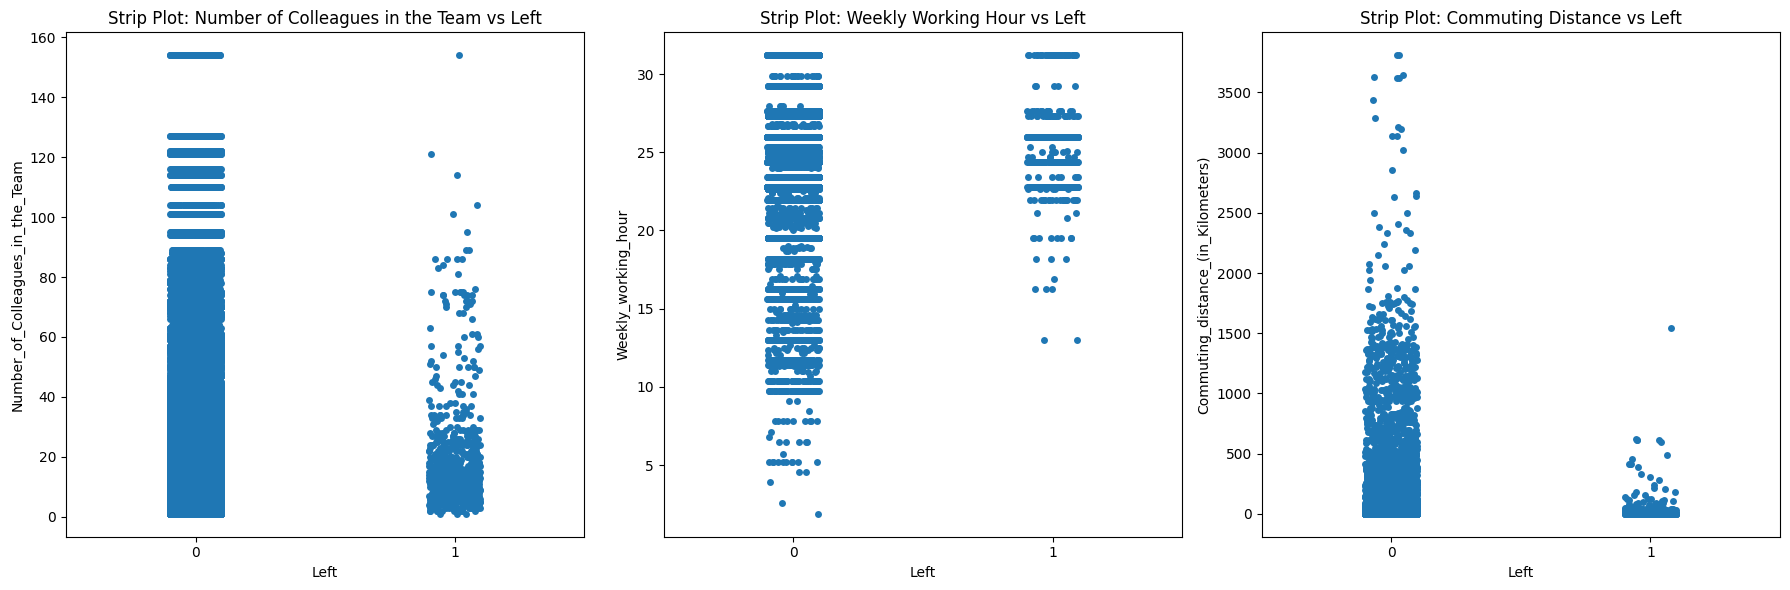

In [35]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Create a strip plot for "Number of Colleagues in the Team"
plt.subplot(1, 3, 1)
sns.stripplot(x='Left', y='Number_of_Colleagues_in_the_Team', data=Employee, jitter=True)
plt.title('Strip Plot: Number of Colleagues in the Team vs Left')

# Create a strip plot for "Weekly Working Hour"
plt.subplot(1, 3, 2)
sns.stripplot(x='Left', y='Weekly_working_hour', data=Employee, jitter=True)
plt.title('Strip Plot: Weekly Working Hour vs Left')

# Create a strip plot for "Commuting Distance (in Kilometers)"
plt.subplot(1, 3, 3)
sns.stripplot(x='Left', y='Commuting_distance_(in_Kilometers)', data=Employee, jitter=True)
plt.title('Strip Plot: Commuting Distance vs Left')

plt.tight_layout()
plt.show()

As I have more than two unique values or high cardinality using Binary Encoding or One-Hot Encoding would be beneficial. I guess for the ones with cardinality = 4, I would utilize the Binary Encoding and for the ones with higher Cardinality, I would utilize the One-Hot Encoding.


Board
#     0.705467
AA    0.899466
CB    0.762456
DT    1.129944
IF    1.047542
KX    0.971628
LV    1.818182
ON    1.304753
OT    1.185771
RC    0.833721
RF    1.415094
RJ    0.727476
dtype: float64
Region
EW    0.837521
HB    0.884368
HS    0.852515
MZ    0.836998
dtype: float64
Division_//_Segment
#         NaN
M    0.835348
Q    0.853882
U    0.942790
Y    1.114827
Z    1.056169
dtype: float64
Segment_Unit
#          NaN
AC    0.803859
AJ    4.545455
CL    1.046025
DD    0.314465
DL    0.468384
DM    0.238095
ET    0.952381
FJ    0.854701
FU    0.896337
FW    1.419878
GT    0.810373
HN         NaN
HV    0.492611
HZ    1.384083
IZ    0.860215
LJ    0.778412
LR    1.666667
ME    0.668896
MO    0.327511
MP    1.126516
MR    1.376147
MV    0.858034
NI    1.188904
NW    1.587302
OE    0.883342
PH         NaN
PN    1.162791
QW    0.803147
RP    0.962530
SF    0.713087
SL    1.245330
TA    1.410935
TL         NaN
VJ    0.917891
WU    1.153846
XA    0.768608
XB    0.563910
YD    0.419287


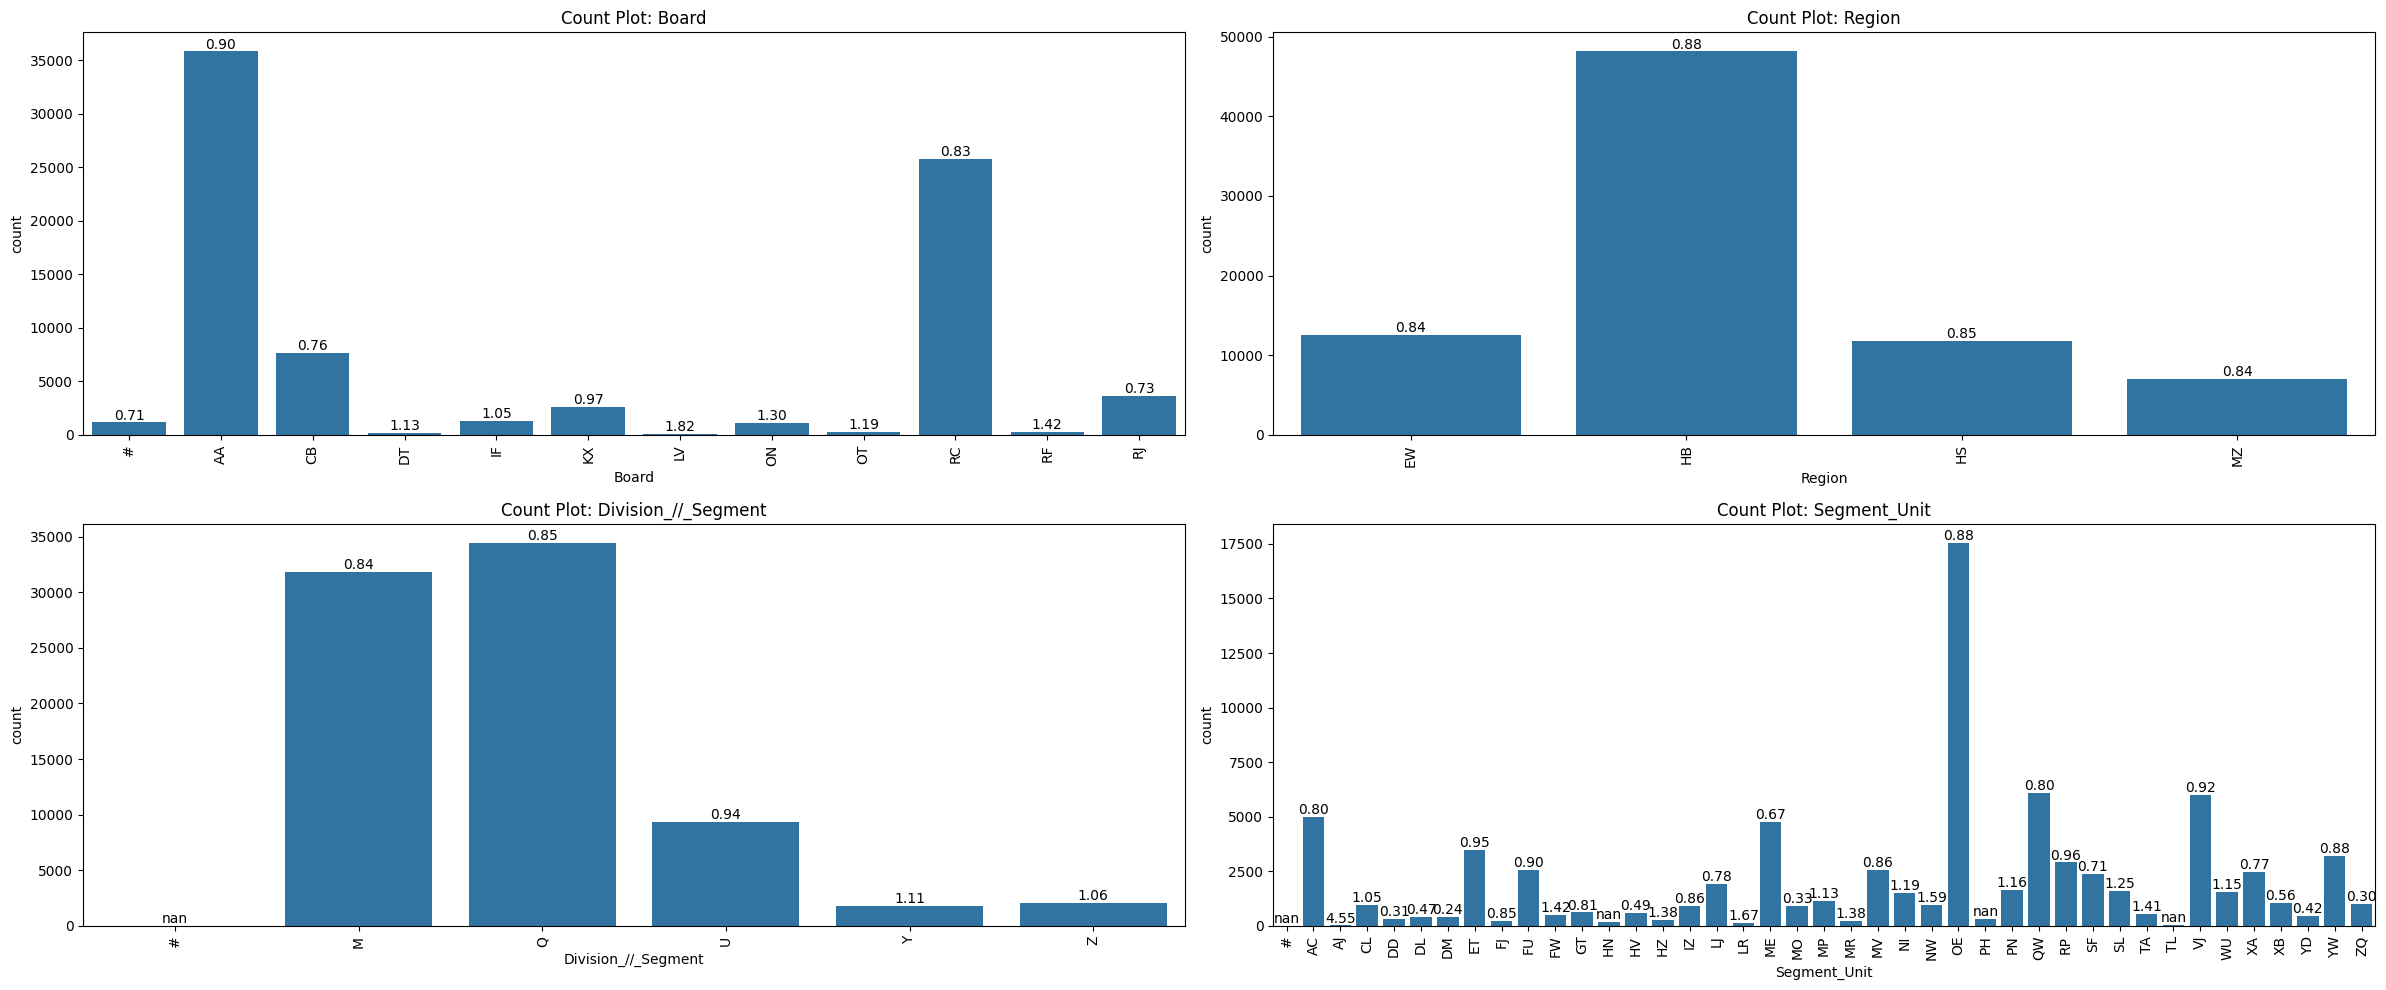

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Employee' is the DataFrame with all employees
# and 'Employee_Turnover' is the DataFrame with employees who left

# Calculate the ratio of employees who left to total employees for each category
categories = [ 'Board', 'Region', 'Division_//_Segment', 'Segment_Unit']

plt.figure(figsize=(24, 10))

for index, category in enumerate(categories, 1):
    plt.subplot(2, 2, index)
    # Grouping without sorting
    total = Employee.groupby(category).size()
    turnover = Employee_Turnover.groupby(category).size()
    ratio = (turnover / total) * 100
    print(ratio)

    # Plotting the count of all employees for each category
    sns.countplot(x=category, data=Employee, order=sorted(Employee[category].unique()))
    plt.title(f'Count Plot: {category}')
    plt.xticks(rotation=90)

    # Adding the ratio as an annotation on top of each bar
    for i, p in enumerate(plt.gca().patches):
        if i < len(ratio):
            # Using iloc to access data by integer location
            annotation = f'{ratio.iloc[i] :.2f}'
            plt.gca().annotate(annotation, (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

plt.tight_layout()
plt.show()

In [37]:
# Assuming 'Employee' is your DataFrame and 'Job_Family_ID' has been properly labeled or adjusted to 'Job_Family'
plt.figure(figsize=(20, 12))
total = Employee.groupby('HR_location').size()
turnover = Employee_Turnover.groupby('HR_location').size()
ratio = (turnover / total) * 100
for i in ratio:
    print(i)

nan
0.6675567423230975
1.2755102040816326
0.81799591002045
nan
4.0
nan
1.6
0.9219088937093275
nan
1.0317460317460316
nan
0.8698306119334656
nan
0.9478672985781991
1.2345679012345678
nan
0.7346189164370982
nan
0.7525870178739417
nan
1.7482517482517483
nan
nan
2.272727272727273
25.0
nan
1.0579064587973273
nan
nan
0.5988023952095809
nan
0.6993006993006993
0.8109477952356817
nan
nan
2.4096385542168677
nan
nan
nan
nan
0.9259259259259258
nan
1.8518518518518516
nan
0.7092198581560284
0.7112375533428165
0.546448087431694
0.26666666666666666
nan
nan
nan
1.7964071856287425
nan
0.8280757097791799
nan
nan
nan
1.1961722488038278
nan
2.1604938271604937
0.27972027972027974
0.628930817610063
0.3993610223642172
nan
nan
1.5424164524421593
1.3071895424836601
0.49504950495049505
nan
100.0
nan
0.5673758865248227
nan
nan
0.9546539379474941
nan
nan
0.7751937984496124
1.0101010101010102
nan
nan
0.4735595895816891
5.0
1.6
nan
nan
1.256281407035176
nan
0.6578947368421052
1.7241379310344827
0.5617977528089888
na

<Figure size 2000x1200 with 0 Axes>

Monte Carlo Simulation
Monte Carlo (MC) simulations are used here to model and predict employee attrition by simulating possible outcomes based on probabilistic assumptions derived from key factors. Here’s how and why MC is applied in this context:

Purpose of Monte Carlo Simulation in This Case
Handling Uncertainty:

Employee attrition depends on multiple factors such as age, length of service, and working hours, which can vary significantly across the workforce.
MC simulates the possible attrition rates by randomly sampling the data multiple times, reflecting the variability and uncertainty in the real-world scenario.
Understanding Probabilistic Outcomes:

Each simulation estimates the likelihood of an employee leaving (binary outcome: 0 for retained, 1 for left) based on weighted contributions of key factors.
Aggregating results from thousands of simulations helps understand the overall attrition trends, including the mean attrition rate and its variability.
Scenario Exploration:

MC allows us to explore different hypothetical situations by varying input parameters (e.g., what happens if employees have longer service durations or reduced working hours).
This helps HR teams or decision-makers test different strategies for reducing attrition.
Generating a Distribution:

By running simulations, we get a distribution of attrition rates rather than a single point estimate, offering deeper insights into potential outcomes.
The histogram generated from the results provides a clear visualization of likely attrition rates under current conditions.
Steps in This MC Simulation:
Random Sampling:

Randomly selects a subset of employees (sample_size) multiple times (num_simulations) to introduce variability.
Attrition Probability:

Calculates the probability of leaving (prob_left) based on normalized values of factors like Age, Length of service, and Working hours.
Combines these probabilities with predefined weights (e.g., 0.3 for age, 0.4 for service length) to simulate the likelihood of attrition.
Binary Outcomes:

Converts these probabilities into binary outcomes (retained or left) using a threshold (e.g., > 0.5).
Aggregated Insights:

Repeats this process across thousands of simulations to compute the average attrition rate and its variability.
Applications of the Results:
Strategic Decision-Making:

HR teams can identify which factors most influence attrition and design policies to improve retention.
Example: If Length of service is found to have a strong correlation with attrition, efforts could focus on enhancing employee engagement for those in critical service ranges.
Predictive Modeling:

The MC simulation serves as an exploratory tool to validate the assumptions or initial guesses used for predictive modeling.
It complements machine learning models by providing probabilistic insights.
Risk Assessment:

Quantifies the risk of high attrition rates and helps prepare contingency plans for worst-case scenarios.
In essence, the MC simulation in this case is a probabilistic modeling approach that captures uncertainty, explores scenarios, and aids in informed decision-making regarding employee retention. Let me know if you’d like further clarification or extensions

In [54]:
Employee = pd.read_csv("https://docs.google.com/spreadsheets/d/1LkShGvBmLqYtB1h-bZhdDtUM5RcQt3cm_SUHt4y_5Bc/gviz/tq?tqx=out:csv&sheet=data")

Mean Attrition Rate: 0.61
Standard Deviation of Attrition Rate: 0.05


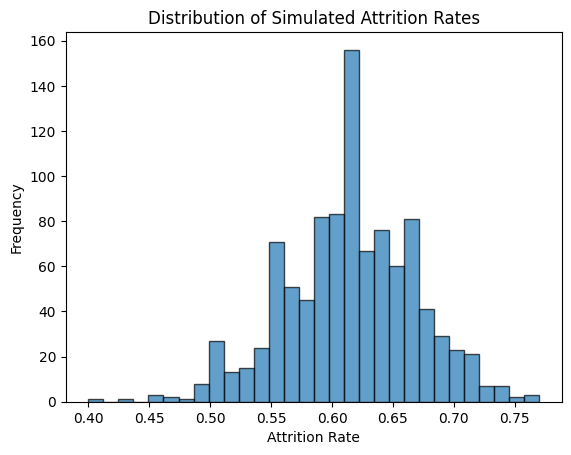

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define key variables for simulation
key_features = ['Age', 'Length_of_service_in_months', 'Weekly_working_hour']
target_variable = 'Left'

# Monte Carlo Simulation Parameters
num_simulations = 1000
sample_size = 100
results = []

for _ in range(num_simulations):
    # Randomly sample the data
    sample = Employee.sample(n=sample_size, replace=True)

    # Simulate probabilities of attrition based on key features
    prob_left = (
        0.3 * (sample['Age'] / sample['Age'].max()) +
        0.4 * (sample['Length_of_service_in_months'] / sample['Length_of_service_in_months'].max()) +
        0.3 * (sample['Weekly_working_hour'] / sample['Weekly_working_hour'].max())
    )

    # Generate binary outcomes (0 = retained, 1 = left) using a threshold
    simulated_outcomes = (prob_left > 0.5).astype(int)

    # Calculate the percentage of simulated employees leaving
    attrition_rate = simulated_outcomes.mean()
    results.append(attrition_rate)

# Summarize Results
mean_attrition_rate = np.mean(results)
std_attrition_rate = np.std(results)

print(f"Mean Attrition Rate: {mean_attrition_rate:.2f}")
print(f"Standard Deviation of Attrition Rate: {std_attrition_rate:.2f}")

# Visualize Results
plt.hist(results, bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution of Simulated Attrition Rates")
plt.xlabel("Attrition Rate")
plt.ylabel("Frequency")
plt.show()
